Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Collecting & Processing the Data

In [ ]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
#combining the 2 data frames, getting only Calories column from calories dataframe, axis=1 means column-wise operation (joining)
calories_data = pd.concat([exercise, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
calories_data.shape #15k training examples, 9 features or 15k rows and 9 columns

(15000, 9)

In [ ]:
calories_data.info() #gender column is object as it is a string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#to check for missing values (alternate method than the one above)
calories_data.isnull().sum() #checks the number of columns with NULL entries & sums them

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Describing Our Data

In [ ]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Let's Visualize Our Data

In [ ]:
sns.set() #gives a theme for our project, just run it once

<Axes: xlabel='Gender', ylabel='count'>

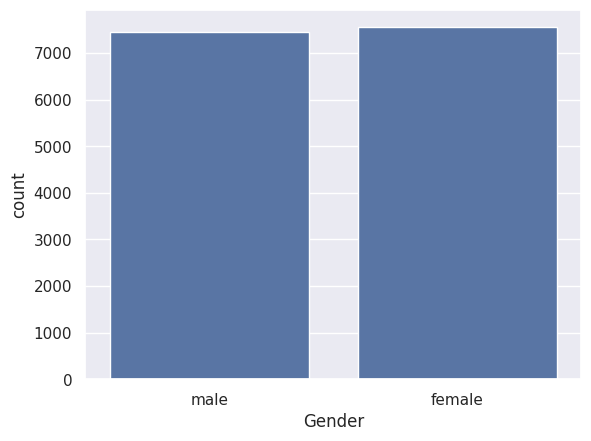

In [ ]:
#check how many are male/female
sns.countplot(x='Gender', data=calories_data) #distributed uniformly, equal M & F

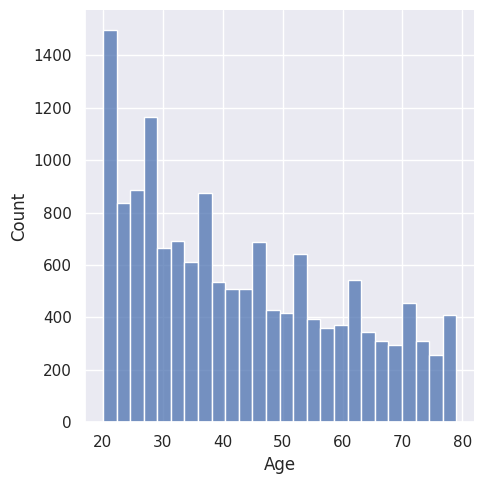

In [ ]:
#finding distribution of age column
sns.displot(calories_data['Age']) #most people are between 20-30

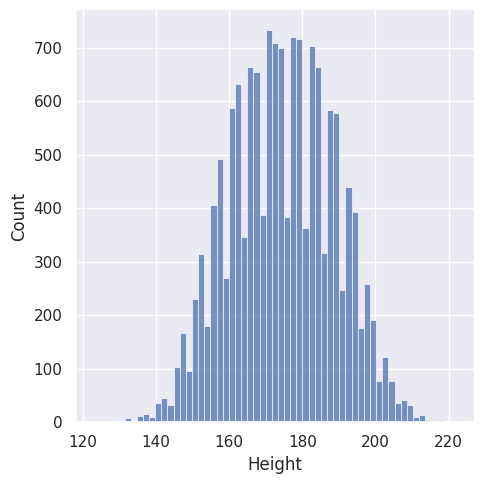

In [ ]:
sns.displot(calories_data['Height']) #normal distribution

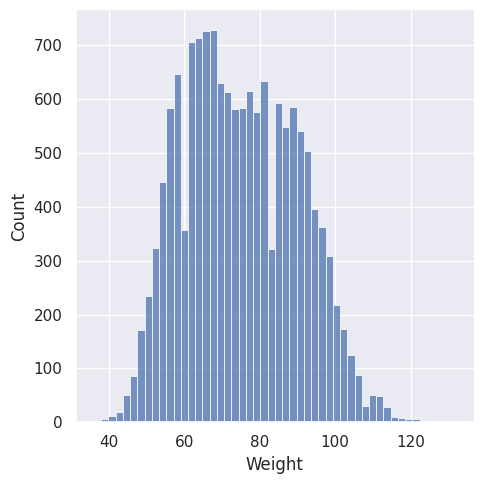

In [ ]:
sns.displot(calories_data['Weight']) #also normal distribution, most around 60-80

Finding a Good Correlation b/w Our Data

In [ ]:
#One Hot Encoding using below code or use LabelEncoder from sklearn
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
correlation = calories_data.corr()

<Axes: >

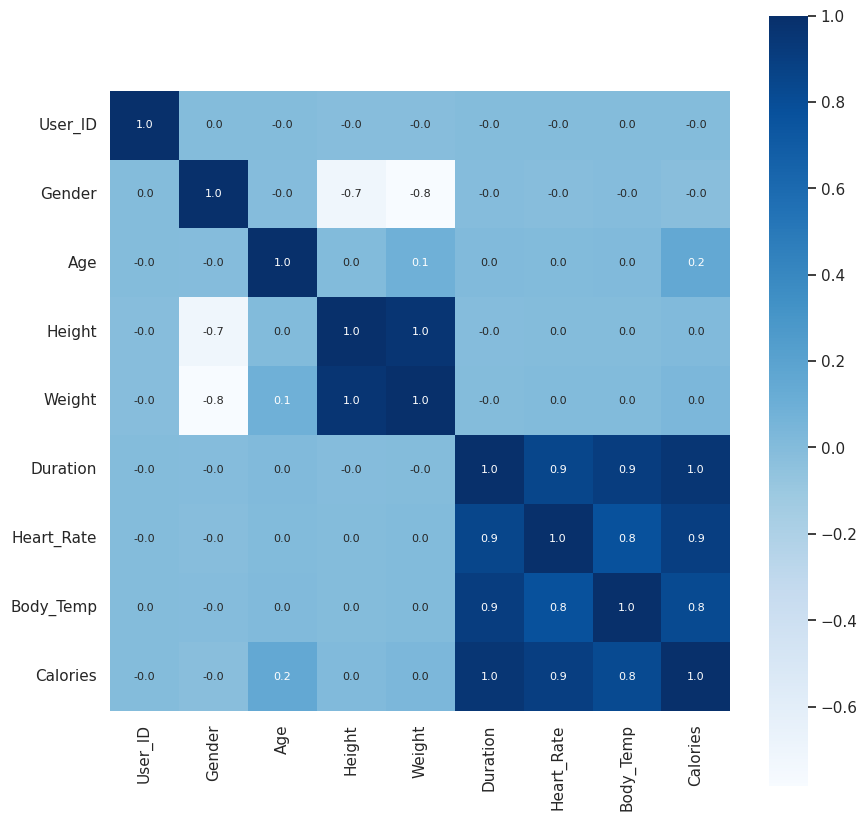

In [ ]:
#let's plot a heatmap to see the correlation of different features with calories burnt
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
#if value is 1, +ve correl., if 0, no correl. but if value -ve, it is -ve correl.
#only focus on chessboard type square on bottom left

Seperating Training Set & Target Set

In [ ]:
X = calories_data.drop(['Calories','User_ID'], axis=1) #X is of shape (15000,7) or 2D Matrix
Y = calories_data['Calories'] #Y is of shape (15000,) or 1D Array

In [ ]:
print(X) #training features
print(Y) #training targets/outputs

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2) #0.2 means 20% is Test Data & 80% is Training Data

In [ ]:
print(X.shape, X_train.shape, X_test.shape) #you can see how it has been split

(15000, 7) (12000, 7) (3000, 7)


Training XGBoost Regressor Model

In [ ]:
model = XGBRegressor() #loading the model

In [ ]:
model.fit(X_train,Y_train) #training the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Checking How Good Our Model Works

In [ ]:
predicted_calories = model.predict(X_test)

In [ ]:
print(predicted_calories)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [ ]:
print(Y_test)

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64


In [ ]:
MeanAbsoluteError = metrics.mean_absolute_error(Y_test, predicted_calories)
print("Mean Absolute Error is ", MeanAbsoluteError)

Mean Absolute Error is  1.4833678883314132


In [ ]:
accuracy = model.score(X_train,Y_train)
print("Accuracy is",round(accuracy*100, 2),"%")

Accuracy is 99.96 %


Saving the Model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb')) #dumping contents of our model into trained_model.sav file opened in write mode (binary)

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb')) #rb means read in binary mode

In [ ]:
#using our loaded model
predicted_loaded = loaded_model.predict(X_test)
print(predicted_loaded)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]
